In [2]:
import pandas as pd;
import numpy as np;

首先读入数据，观察数据，准备哪些特征需要重点提取。

In [16]:
train_df=pd.read_csv('./input_data/train.csv')
test_df=pd.read_csv('./input_data/test.csv')
train_df["trainortest"]="train" #添加一列区分训练集合还是测试集合
test_df["trainortest"]="test"
y_train = train_df.pop("Survived")  #将train_df的标签列pop出来，后面做训练用
all_df=pd.concat((train_df,test_df))

In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
trainortest    891 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 83.6+ KB


In [18]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
trainortest    418 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 39.3+ KB


In [21]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
trainortest    1309 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 132.9+ KB


In [29]:
all_df.columns[pd.isnull(all_df).sum()>0]

Index(['Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [41]:
all_df.PassengerId.value_counts().sort_values

<bound method Series.sort_values of 1309    1
449     1
431     1
432     1
433     1
434     1
435     1
436     1
437     1
438     1
439     1
440     1
441     1
442     1
443     1
444     1
445     1
446     1
447     1
430     1
429     1
428     1
418     1
411     1
412     1
413     1
414     1
415     1
416     1
417     1
       ..
890     1
880     1
891     1
892     1
893     1
894     1
895     1
896     1
897     1
881     1
879     1
861     1
869     1
862     1
863     1
864     1
865     1
866     1
867     1
868     1
870     1
878     1
871     1
872     1
873     1
874     1
875     1
876     1
877     1
1       1
Name: PassengerId, Length: 1309, dtype: int64>

In [42]:
all_df.Pclass.value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

In [46]:
train_df=pd.read_csv('./input_data/train.csv')
s0=train_df.Pclass[train_df.Survived == 0].value_counts()

In [47]:
s1=train_df.Pclass[train_df.Survived == 1].value_counts()

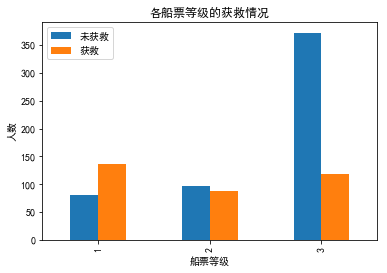

In [51]:
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib.pylab import * 
mpl.rcParams['font.sans-serif'] = ['SimHei']  
df=pd.DataFrame({u'获救':s1, u'未获救':s0})
df.plot(kind='bar')
plt.title(u"各船票等级的获救情况")
plt.xlabel(u"船票等级") 
plt.ylabel(u"人数") 
plt.show()

分析名字，提取称呼，根据称呼可以大致的判断性别年龄等。还可以提取姓氏

In [52]:
all_df.Name.head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [96]:
import re
import numpy as np
regx = re.compile('(.*, )|(\\..*)')          
title=[]
for name in all_df.Name.values:
    title.append(re.sub(regx,'',name))
all_df['title']=title

In [86]:
all_df.title.value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
the Countess      1
Sir               1
Don               1
Mme               1
Capt              1
Jonkheer          1
Lady              1
Dona              1
Name: title, dtype: int64

In [97]:
all_df.loc[all_df.title=='Mlle','title']='Miss'
all_df.loc[all_df.title=='Ms','title']='Miss'
all_df.loc[all_df.title=='Mme','title']='Mrs'

In [98]:
all_df.title.value_counts()

Mr              757
Miss            264
Mrs             198
Master           61
Dr                8
Rev               8
Col               4
Major             2
Sir               1
the Countess      1
Dona              1
Don               1
Capt              1
Jonkheer          1
Lady              1
Name: title, dtype: int64

In [100]:
common=['Mr','Miss','Mrs','Master']
all_df.loc[~all_df.title.isin(common) ,'title']='rare'

In [101]:
all_df.title.value_counts()

Mr        757
Miss      264
Mrs       198
Master     61
rare       29
Name: title, dtype: int64

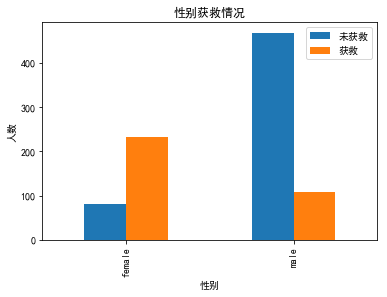

In [104]:
s0=train_df.Sex[train_df.Survived == 0].value_counts()
s1=train_df.Sex[train_df.Survived == 1].value_counts()
df=pd.DataFrame({u'获救':s1, u'未获救':s0})
df.plot(kind='bar')
plt.title(u"性别获救情况")
plt.xlabel(u"性别") 
plt.ylabel(u"人数") 
plt.show()

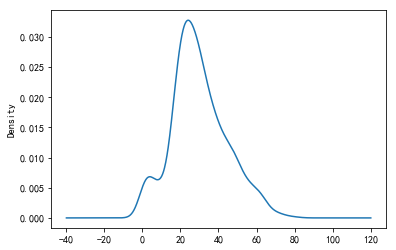

In [109]:
all_df.Age.plot(kind='kde')
matplotlib.rcParams['axes.unicode_minus']=False
plt.show()

In [113]:
all_df.SibSp.value_counts()

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64

In [114]:
all_df.Parch.value_counts()

0    1002
1     170
2     113
3       8
5       6
4       6
9       2
6       2
Name: Parch, dtype: int64

In [115]:
all_df['family_cnt']=all_df['Parch']+all_df['SibSp']+1

In [119]:
all_df.family_cnt.value_counts()

1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: family_cnt, dtype: int64

In [121]:
all_df.loc[all_df.family_cnt==1,'family_type']='sigle'
all_df.loc[all_df.family_cnt.isin([2,3]),'family_type']='middle'
all_df.loc[all_df.family_cnt>=4,'family_type']='big'

In [122]:
all_df.family_type.value_counts()

sigle     790
middle    394
big       125
Name: family_type, dtype: int64

In [123]:
train_df['family_cnt']=train_df['Parch']+train_df['SibSp']+1
train_df.loc[train_df.family_cnt==1,'family_type']='sigle'
train_df.loc[train_df.family_cnt.isin([2,3]),'family_type']='middle'
train_df.loc[train_df.family_cnt>=4,'family_type']='big'

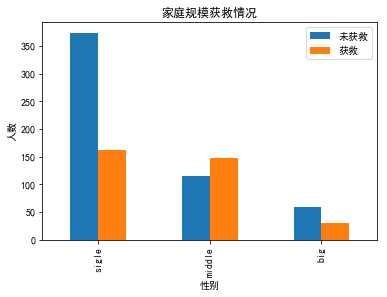

In [124]:
s0=train_df.family_type[train_df.Survived == 0].value_counts()
s1=train_df.family_type[train_df.Survived == 1].value_counts()
df=pd.DataFrame({u'获救':s1, u'未获救':s0})
df.plot(kind='bar')
plt.title(u"家庭规模获救情况")
plt.xlabel(u"家庭规模") 
plt.ylabel(u"人数") 
plt.show()

In [133]:
all_df.Ticket.value_counts()

CA. 2343              11
CA 2144                8
1601                   8
3101295                7
347077                 7
347082                 7
PC 17608               7
S.O.C. 14879           7
347088                 6
19950                  6
382652                 6
113781                 6
349909                 5
PC 17757               5
220845                 5
4133                   5
16966                  5
W./C. 6608             5
113503                 5
C.A. 2315              4
C.A. 34651             4
230136                 4
LINE                   4
12749                  4
SC/Paris 2123          4
113760                 4
PC 17760               4
24160                  4
PC 17483               4
2666                   4
                      ..
A. 2. 39186            1
349253                 1
347065                 1
7538                   1
14313                  1
350404                 1
368783                 1
350036                 1
211536                 1


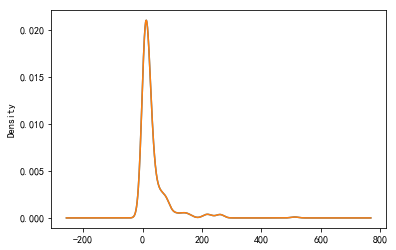

In [136]:
all_df.Fare.plot('kde')
plt.show()

In [137]:
all_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,family_cnt
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,655.000000,2.294882,29.881138,0.498854,0.385027,33.295479,1.883881
std,378.020061,0.837836,14.413493,1.041658,0.865560,51.758668,1.583639
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,328.000000,2.000000,21.000000,0.000000,0.000000,7.895800,1.000000
50%,655.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,982.000000,3.000000,39.000000,1.000000,0.000000,31.275000,2.000000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200,11.000000


In [139]:
all_df.loc[all_df.Fare.isnull(),'Fare']=14.4542

In [151]:
cabin_type=[]
for tmp_cabin in all_df.Cabin.values:
    cabin_type.append(str(tmp_cabin)[0])
all_df['cabin_type']=cabin_type

In [152]:
all_df.cabin_type.value_counts()

n    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: cabin_type, dtype: int64

In [153]:
all_df.loc[all_df.cabin_type=='G','cabin_type']='O'
all_df.loc[all_df.cabin_type=='T','cabin_type']='O'

In [154]:
all_df.cabin_type.value_counts()

n    1014
C      94
B      65
D      46
E      41
A      22
F      21
O       6
Name: cabin_type, dtype: int64

In [155]:
train_cabin_type=[]
for tmp_cabin in train_df.Cabin.values:
    train_cabin_type.append(str(tmp_cabin)[0])
train_df['cabin_type']=train_cabin_type
train_df.loc[train_df.cabin_type=='G','cabin_type']='O'
train_df.loc[train_df.cabin_type=='T','cabin_type']='O'

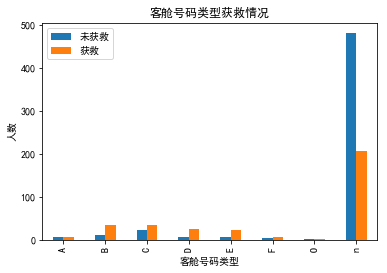

In [157]:
s0=train_df.cabin_type[train_df.Survived == 0].value_counts()
s1=train_df.cabin_type[train_df.Survived == 1].value_counts()
df=pd.DataFrame({u'获救':s1, u'未获救':s0})
df.plot(kind='bar')
plt.title(u"客舱号码类型获救情况")
plt.xlabel(u"客舱号码类型") 
plt.ylabel(u"人数") 
plt.show()

In [158]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 16 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
trainortest    1309 non-null object
title          1309 non-null object
family_cnt     1309 non-null int64
family_type    1309 non-null object
cabin_type     1309 non-null object
dtypes: float64(2), int64(5), object(9)
memory usage: 213.9+ KB


In [159]:
all_df.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [160]:
all_df.loc[all_df.Embarked.isnull(),'Embarked']='S'

In [161]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 16 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
trainortest    1309 non-null object
title          1309 non-null object
family_cnt     1309 non-null int64
family_type    1309 non-null object
cabin_type     1309 non-null object
dtypes: float64(2), int64(5), object(9)
memory usage: 213.9+ KB


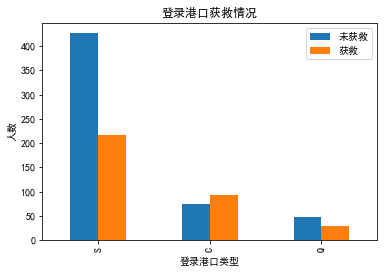

In [162]:
s0=train_df.Embarked[train_df.Survived == 0].value_counts()
s1=train_df.Embarked[train_df.Survived == 1].value_counts()
df=pd.DataFrame({u'获救':s1, u'未获救':s0})
df.plot(kind='bar')
plt.title(u"登录港口获救情况")
plt.xlabel(u"登录港口类型") 
plt.ylabel(u"人数") 
plt.show()

In [178]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 16 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
trainortest    1309 non-null object
title          1309 non-null object
family_cnt     1309 non-null int64
family_type    1309 non-null object
cabin_type     1309 non-null object
dtypes: float64(2), int64(5), object(9)
memory usage: 213.9+ KB


In [179]:
all_df=pd.get_dummies(all_df,columns=['Pclass','Sex','Embarked','title','family_type','cabin_type'])

In [182]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 34 columns):
PassengerId           1309 non-null int64
Name                  1309 non-null object
Age                   1046 non-null float64
SibSp                 1309 non-null int64
Parch                 1309 non-null int64
Ticket                1309 non-null object
Fare                  1309 non-null float64
Cabin                 295 non-null object
trainortest           1309 non-null object
family_cnt            1309 non-null int64
Pclass_1              1309 non-null uint8
Pclass_2              1309 non-null uint8
Pclass_3              1309 non-null uint8
Sex_female            1309 non-null uint8
Sex_male              1309 non-null uint8
Embarked_C            1309 non-null uint8
Embarked_Q            1309 non-null uint8
Embarked_S            1309 non-null uint8
title_Master          1309 non-null uint8
title_Miss            1309 non-null uint8
title_Mr              1309 non-null uint8
title

In [185]:
import sklearn.preprocessing as preprocessing
scaler = preprocessing.StandardScaler()
age_scale_param = scaler.fit(all_df[['Fare']])
all_df['Fare_scaled'] = scaler.fit_transform(all_df[['Fare']], age_scale_param)

age_scale_param = scaler.fit(all_df[['family_cnt']])
all_df['family_cnt_scaled'] = scaler.fit_transform(all_df[['family_cnt']], age_scale_param)

age_scale_param = scaler.fit(all_df[['SibSp']])
all_df['SibSp_scaled'] = scaler.fit_transform(all_df[['SibSp']], age_scale_param)

age_scale_param = scaler.fit(all_df[['Parch']])
all_df['Parch_scaled'] = scaler.fit_transform(all_df[['Parch']], age_scale_param)



In [190]:
all_df.columns

Index(['PassengerId', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'trainortest', 'family_cnt', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'title_Master', 'title_Miss', 'title_Mr', 'title_Mrs',
       'title_rare', 'family_type_big', 'family_type_middle',
       'family_type_sigle', 'cabin_type_A', 'cabin_type_B', 'cabin_type_C',
       'cabin_type_D', 'cabin_type_E', 'cabin_type_F', 'cabin_type_O',
       'cabin_type_n', 'Fare_scaled', 'family_cnt_scaled', 'SibSp_scaled',
       'Parch_scaled'],
      dtype='object')

In [191]:
age_factor=[ 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'title_Master', 'title_Miss', 'title_Mr', 'title_Mrs',
       'title_rare', 'family_type_big', 'family_type_middle',
       'family_type_sigle', 'cabin_type_A', 'cabin_type_B', 'cabin_type_C',
       'cabin_type_D', 'cabin_type_E', 'cabin_type_F', 'cabin_type_O',
       'cabin_type_n', 'Fare_scaled', 'family_cnt_scaled', 'SibSp_scaled',
       'Parch_scaled']
agenull_test=all_df.loc[all_df.Age.isnull(),age_factor]
agenotnull_train=all_df.loc[~all_df.Age.isnull(),age_factor]
agenotnull_label=all_df.loc[~all_df.Age.isnull(),'Age']

In [192]:
from sklearn.ensemble import RandomForestRegressor 
rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
rfr.fit(agenotnull_train.values,agenotnull_label.values)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=2000, n_jobs=-1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [193]:
age_pre=rfr.predict(agenull_test.values)

In [196]:
all_df.loc[all_df.Age.isnull(),'Age']=age_pre

In [197]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 38 columns):
PassengerId           1309 non-null int64
Name                  1309 non-null object
Age                   1309 non-null float64
SibSp                 1309 non-null int64
Parch                 1309 non-null int64
Ticket                1309 non-null object
Fare                  1309 non-null float64
Cabin                 295 non-null object
trainortest           1309 non-null object
family_cnt            1309 non-null int64
Pclass_1              1309 non-null uint8
Pclass_2              1309 non-null uint8
Pclass_3              1309 non-null uint8
Sex_female            1309 non-null uint8
Sex_male              1309 non-null uint8
Embarked_C            1309 non-null uint8
Embarked_Q            1309 non-null uint8
Embarked_S            1309 non-null uint8
title_Master          1309 non-null uint8
title_Miss            1309 non-null uint8
title_Mr              1309 non-null uint8
title

In [198]:
all_df.pop('Name')
all_df.pop('Ticket')
all_df.pop('Cabin')


0              NaN
1              C85
2              NaN
3             C123
4              NaN
5              NaN
6              E46
7              NaN
8              NaN
9              NaN
10              G6
11            C103
12             NaN
13             NaN
14             NaN
15             NaN
16             NaN
17             NaN
18             NaN
19             NaN
20             NaN
21             D56
22             NaN
23              A6
24             NaN
25             NaN
26             NaN
27     C23 C25 C27
28             NaN
29             NaN
          ...     
388            NaN
389            NaN
390            B24
391            D28
392            NaN
393            NaN
394            NaN
395            C31
396            NaN
397            B41
398            NaN
399            NaN
400             C7
401            NaN
402            NaN
403            NaN
404            D40
405            D38
406            NaN
407            C80
408            NaN
409         

In [203]:
all_df.loc[all_df.Age<=12,'Age_type']='child'
all_df.loc[all_df.Age.between(13,40),'Age_type']='adult'
all_df.loc[all_df.Age>40,'Age_type']='old'

In [204]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 36 columns):
PassengerId           1309 non-null int64
Age                   1309 non-null float64
SibSp                 1309 non-null int64
Parch                 1309 non-null int64
Fare                  1309 non-null float64
trainortest           1309 non-null object
family_cnt            1309 non-null int64
Pclass_1              1309 non-null uint8
Pclass_2              1309 non-null uint8
Pclass_3              1309 non-null uint8
Sex_female            1309 non-null uint8
Sex_male              1309 non-null uint8
Embarked_C            1309 non-null uint8
Embarked_Q            1309 non-null uint8
Embarked_S            1309 non-null uint8
title_Master          1309 non-null uint8
title_Miss            1309 non-null uint8
title_Mr              1309 non-null uint8
title_Mrs             1309 non-null uint8
title_rare            1309 non-null uint8
family_type_big       1309 non-null uint8
family_

In [206]:
all_df=pd.get_dummies(all_df,columns=['Age_type'])

In [207]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 38 columns):
PassengerId           1309 non-null int64
Age                   1309 non-null float64
SibSp                 1309 non-null int64
Parch                 1309 non-null int64
Fare                  1309 non-null float64
trainortest           1309 non-null object
family_cnt            1309 non-null int64
Pclass_1              1309 non-null uint8
Pclass_2              1309 non-null uint8
Pclass_3              1309 non-null uint8
Sex_female            1309 non-null uint8
Sex_male              1309 non-null uint8
Embarked_C            1309 non-null uint8
Embarked_Q            1309 non-null uint8
Embarked_S            1309 non-null uint8
title_Master          1309 non-null uint8
title_Miss            1309 non-null uint8
title_Mr              1309 non-null uint8
title_Mrs             1309 non-null uint8
title_rare            1309 non-null uint8
family_type_big       1309 non-null uint8
family_

In [208]:
age_scale_param = scaler.fit(all_df[['Age']])
all_df['Age_scaled'] = scaler.fit_transform(all_df[['Age']], age_scale_param)

In [209]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 39 columns):
PassengerId           1309 non-null int64
Age                   1309 non-null float64
SibSp                 1309 non-null int64
Parch                 1309 non-null int64
Fare                  1309 non-null float64
trainortest           1309 non-null object
family_cnt            1309 non-null int64
Pclass_1              1309 non-null uint8
Pclass_2              1309 non-null uint8
Pclass_3              1309 non-null uint8
Sex_female            1309 non-null uint8
Sex_male              1309 non-null uint8
Embarked_C            1309 non-null uint8
Embarked_Q            1309 non-null uint8
Embarked_S            1309 non-null uint8
title_Master          1309 non-null uint8
title_Miss            1309 non-null uint8
title_Mr              1309 non-null uint8
title_Mrs             1309 non-null uint8
title_rare            1309 non-null uint8
family_type_big       1309 non-null uint8
family_

In [210]:
all_df.pop('Age')
all_df.pop('SibSp')
all_df.pop('Parch')
all_df.pop('Fare')

0        7.2500
1       71.2833
2        7.9250
3       53.1000
4        8.0500
5        8.4583
6       51.8625
7       21.0750
8       11.1333
9       30.0708
10      16.7000
11      26.5500
12       8.0500
13      31.2750
14       7.8542
15      16.0000
16      29.1250
17      13.0000
18      18.0000
19       7.2250
20      26.0000
21      13.0000
22       8.0292
23      35.5000
24      21.0750
25      31.3875
26       7.2250
27     263.0000
28       7.8792
29       7.8958
         ...   
388      7.7500
389     21.0750
390     93.5000
391     39.4000
392     20.2500
393     10.5000
394     22.0250
395     60.0000
396      7.2500
397     79.2000
398      7.7750
399      7.7333
400    164.8667
401     21.0000
402     59.4000
403     47.1000
404     27.7208
405     13.8625
406     10.5000
407    211.5000
408      7.7208
409     13.7750
410      7.7500
411     90.0000
412      7.7750
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, Length: 1309

In [211]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 35 columns):
PassengerId           1309 non-null int64
trainortest           1309 non-null object
family_cnt            1309 non-null int64
Pclass_1              1309 non-null uint8
Pclass_2              1309 non-null uint8
Pclass_3              1309 non-null uint8
Sex_female            1309 non-null uint8
Sex_male              1309 non-null uint8
Embarked_C            1309 non-null uint8
Embarked_Q            1309 non-null uint8
Embarked_S            1309 non-null uint8
title_Master          1309 non-null uint8
title_Miss            1309 non-null uint8
title_Mr              1309 non-null uint8
title_Mrs             1309 non-null uint8
title_rare            1309 non-null uint8
family_type_big       1309 non-null uint8
family_type_middle    1309 non-null uint8
family_type_sigle     1309 non-null uint8
cabin_type_A          1309 non-null uint8
cabin_type_B          1309 non-null uint8
cabin_type_

In [212]:
train_data=all_df[all_df.trainortest=='train']

In [220]:
test_data=all_df[all_df.trainortest=='test']

In [222]:
test_data.pop('trainortest')
train_data.pop('trainortest')

0      train
1      train
2      train
3      train
4      train
5      train
6      train
7      train
8      train
9      train
10     train
11     train
12     train
13     train
14     train
15     train
16     train
17     train
18     train
19     train
20     train
21     train
22     train
23     train
24     train
25     train
26     train
27     train
28     train
29     train
       ...  
861    train
862    train
863    train
864    train
865    train
866    train
867    train
868    train
869    train
870    train
871    train
872    train
873    train
874    train
875    train
876    train
877    train
878    train
879    train
880    train
881    train
882    train
883    train
884    train
885    train
886    train
887    train
888    train
889    train
890    train
Name: trainortest, Length: 891, dtype: object

In [223]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 34 columns):
PassengerId           418 non-null int64
family_cnt            418 non-null int64
Pclass_1              418 non-null uint8
Pclass_2              418 non-null uint8
Pclass_3              418 non-null uint8
Sex_female            418 non-null uint8
Sex_male              418 non-null uint8
Embarked_C            418 non-null uint8
Embarked_Q            418 non-null uint8
Embarked_S            418 non-null uint8
title_Master          418 non-null uint8
title_Miss            418 non-null uint8
title_Mr              418 non-null uint8
title_Mrs             418 non-null uint8
title_rare            418 non-null uint8
family_type_big       418 non-null uint8
family_type_middle    418 non-null uint8
family_type_sigle     418 non-null uint8
cabin_type_A          418 non-null uint8
cabin_type_B          418 non-null uint8
cabin_type_C          418 non-null uint8
cabin_type_D          418 non-null

In [224]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 34 columns):
PassengerId           891 non-null int64
family_cnt            891 non-null int64
Pclass_1              891 non-null uint8
Pclass_2              891 non-null uint8
Pclass_3              891 non-null uint8
Sex_female            891 non-null uint8
Sex_male              891 non-null uint8
Embarked_C            891 non-null uint8
Embarked_Q            891 non-null uint8
Embarked_S            891 non-null uint8
title_Master          891 non-null uint8
title_Miss            891 non-null uint8
title_Mr              891 non-null uint8
title_Mrs             891 non-null uint8
title_rare            891 non-null uint8
family_type_big       891 non-null uint8
family_type_middle    891 non-null uint8
family_type_sigle     891 non-null uint8
cabin_type_A          891 non-null uint8
cabin_type_B          891 non-null uint8
cabin_type_C          891 non-null uint8
cabin_type_D          891 non-null

In [ ]:
train_data.to_csv('train_data.csv')
